In [7]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
from scipy.stats import cauchy


def jade(fobj, bounds, popsize=20, its=1000, goal=0, c=0.5):
    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    population = min_b + pop * diff
    population_new = np.random.rand(popsize, dimensions)
    for i in range(len(population_new)):
        population_new[i] = pop[i]
    mut = 0.5
    mean_cr = 0.5
    mean_mut = 0.5
    a = []
    for i in range(its):
        s_mut = []
        s_cr = []
        matrix_sort(population, fobj, pop)
        best = population[0]
        fitness_best = fobj(best)
        fitness = np.asarray([fobj(ind) for ind in population])
        for j in range(popsize):
            p = int(np.random.rand() * popsize)
            idx_x_best_p = random.randint(0, p)
            x_best_p = population[idx_x_best_p]
            idxs = [idx for idx in range(popsize) if idx != j]
            x_r1, x_r2 = population[np.random.choice(idxs, 2, replace=False)]
            idx_x_r2 = random.randint(0, len(population) + len(a) - 3)
            if idx_x_r2 >= (len(population) - 2):
                x_r2 = a[idx_x_r2 - len(population) + 2]
            mut = cauchy.rvs(loc=mean_mut, scale=0.1)
            while mut < 0 or mut > 1:
                mut = cauchy.rvs(loc=mean_mut, scale=0.1)
            mutant = np.clip(population[j] + mut * (x_best_p - population[j]) + mut * (x_r1 - x_r2), min_b, max_b)
            cr = random.gauss(mean_cr, 0.1)
            cross_points = np.random.rand(dimensions) < cr
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, population[j])
            f = fobj(trial)
            if f < fitness[j]:
                population_new[j] = trial
                a.append(population[j])
                s_cr.append(cr)
                s_mut.append(mut)
            else:
                population_new[j] = population[j]
        while len(a) > popsize:
            index = random.randint(0, len(a)-1)
            a.pop(index)
        for k in range(len(population_new)):
            population[k] = population_new[k]
        mean_cr = (1 - c) * mean_cr + c * np.mean(s_cr)
        mean_mut = (1 - c) * mean_mut + c * (sum(ff ** 2 for ff in s_mut) / sum(s_mut))
        if np.fabs(fitness_best - goal) < 1e-6:
            break
        yield best, fitness_best

(array([-2.31054466e-05,  1.10315607e-05]), 7.243607252327422e-05)


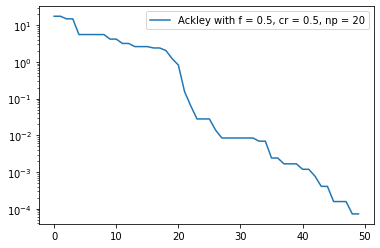

In [8]:
def ackley(x):
    p1 = -0.2 * ((0.5 * sum(x ** 2)) ** 0.5)
    p2 = 0.5 * (sum(np.cos(2 * np.pi * x)))
    return np.exp(1) + 20 - 20 * np.exp(p1) - np.exp(p2)


def ackley_de():
    it = list(jade(ackley, [(-32.768, 32.768)] * 2, popsize=20, its=50))
    print(it[-1])
    x, f = zip(*it)
    plt.plot(f, label='Ackley with f = 0.5, cr = 0.5, np = 20')
    plt.yscale('log')
    plt.legend()


def matrix_sort(matrix, fobj, pop):
    for i in range(len(matrix)):
        for j in range(i, len(matrix)):
            if fobj(matrix[i]) > fobj(matrix[j]):
                pop[i] = matrix[i]
                pop[j] = matrix[j]
                matrix[i] = pop[j]
                matrix[j] = pop[i]
    return matrix
ackley_de()

In [16]:
result = jade(ackley, [(-32.768, 32.768)] * 2, popsize=20, its=50)
print()

TypeError: object of type 'generator' has no len()